In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [46]:
#assign path for loading the data files 
import os
datapath = os.path.join("datasets", "lifesat", "")

In [47]:
# Load the data
oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [48]:
#data preprocessing function 
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [49]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

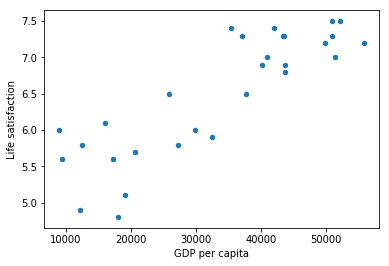

In [50]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

## simple linear model

In [51]:
# Select a linear model
model = sklearn.linear_model.LinearRegression() # Train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# Make a prediction for Cyprus
x1 = 22587
X_new = [[x1]] # Cyprus' GDP per capita print(model.predict(X_new)) 
y1 = model.predict(X_new)[0][0]
print(y1) # outputs [[ 5.96242338]]

5.962423376619663


In [53]:
# obtain weights from the fit model 
w1, w2 = model.intercept_[0], model.coef_[0][0]

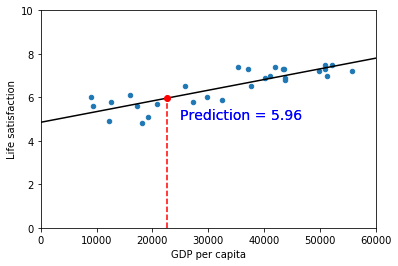

In [54]:
# plot the model result 
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
Xs=np.linspace(0, 60000, 1000)
plt.plot(Xs, w1 + w2 * Xs, "k")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot([x1, x1], [0, y1], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(x1, y1, "ro")
plt.show()

## k-neighbors regression

In [55]:
# with this k-neighbors regression model:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
# Train the model
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [56]:
# Make a prediction for Cyprus
x1 = 22587
X_new = [[x1]] # Cyprus' GDP per capita print(model.predict(X_new)) 
y1 = model.predict(X_new)[0][0]
print(y1) # outputs [[ 5.96242338]]

5.766666666666666
